# CRACKS DETECTION

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image

In [2]:
train_dir = 'data/train/'
test_dir = 'data/test/'
val_dir ='data/validation/'

#  Image Sample

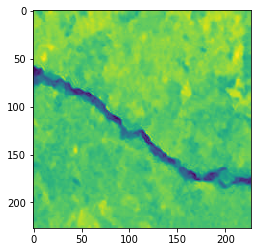

In [3]:
img_dir = 'data/train/positive/00027.jpg'
image =  plt.imread(img_dir)
#plt.imshow(image)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)


# Comparison Between Coloured And Grayscale Images

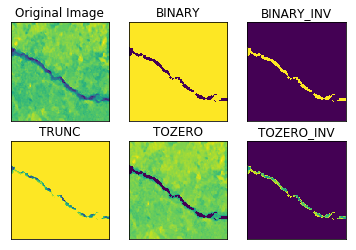

In Grayscale


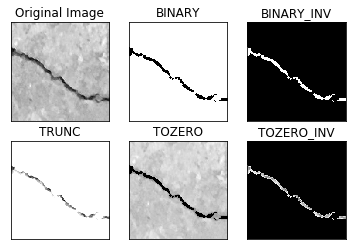

In [4]:
img = cv2.imread(img_dir,0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

print('In Grayscale')
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

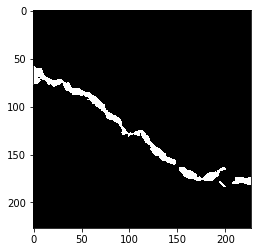

In [5]:
plt.imshow(thresh2, 'gray')

# Functions For Processing Images And Creating Data

In [6]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

# Training Data : 3000 Images

In [7]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'positive', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'negative', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))        
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))   

print('Shape of Training Data : '+str(final_train_colr.shape))    

Working On Training Data : positive

Images Processed from 00001 to 01500

Working On Training Data : negative

Images Processed from 00001 to 01500

Shape of Training Data : (3000, 227, 227, 1)


 Positive Data

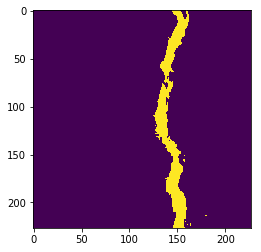

In [8]:
plt.imshow(train_data_inv_pos[5])

 Negative Data

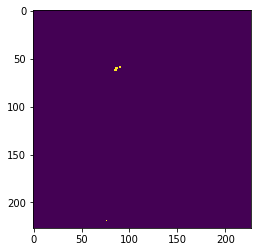

In [9]:
plt.imshow(train_data_inv_neg[5])

# Validation Data: 600

In [10]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 1701, 2000, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 1701, 2000, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : positive

Images Processed from 01701 to 02000

Working On Validation Data : negative

Images Processed from 01701 to 02000

Shape of Validation Data : (600, 227, 227, 1)


# Testing Data : 400 Images

In [11]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 1501, 1700, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 1501, 1700, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : positive

Images Processed from 01501 to 01700

Working On Testing Data : negative

Images Processed from 01501 to 01700

Shape of Testing Data : (400, 227, 227, 1)


In [12]:
train_labels[20]

1

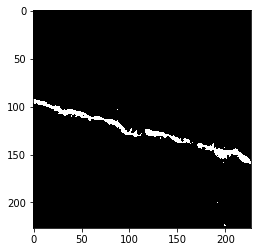

In [13]:
plt.imshow(train_data_inv[20], 'gray')

# Model Creation (Convolutional Neural Networks)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model


Using TensorFlow backend.


In [15]:
input_shape = (227, 227, 1)
Wh = 3
Ww = 3

In [16]:
model = Sequential()
model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
batch_size = 250
epochs = 30

#  Training Process

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(final_train_inv, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(final_val_inv, val_labels))

Train on 3000 samples, validate on 600 samples
Epoch 1/30
3000/3000 [==============================] - 260s 87ms/step - loss: 3.2371 - acc: 0.7280 - val_loss: 0.7326 - val_acc: 0.9400
Epoch 2/30
3000/3000 [==============================] - 262s 87ms/step - loss: 1.2309 - acc: 0.8993 - val_loss: 0.9978 - val_acc: 0.9183
Epoch 3/30
3000/3000 [==============================] - 262s 87ms/step - loss: 1.3301 - acc: 0.9103 - val_loss: 0.4149 - val_acc: 0.9683
Epoch 4/30
3000/3000 [==============================] - 267s 89ms/step - loss: 0.5858 - acc: 0.9563 - val_loss: 0.4307 - val_acc: 0.9717
Epoch 5/30
3000/3000 [==============================] - 268s 89ms/step - loss: 0.6677 - acc: 0.9563 - val_loss: 0.4943 - val_acc: 0.9650
Epoch 6/30
3000/3000 [==============================] - 267s 89ms/step - loss: 0.4855 - acc: 0.9653 - val_loss: 0.4452 - val_acc: 0.9717
Epoch 7/30
3000/3000 [==============================] - 271s 90ms/step - loss: 0.4814 - acc: 0.9683 - val_loss: 0.4929 - val_acc: 0

# Accuracy And Loss 

In [19]:
score=model.evaluate(final_test_inv, test_labels)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

400/400 [==============================] - 13s 32ms/step
Final Accuracy :  97.5 %
Final Loss :  0.3562050382560025


#  Image Predictor (Functions)

In [20]:
def predict_image_util(final_pred_inv):
    img_test = (final_pred_inv[0].reshape((1, 227, 227, 1)))  
    raw_predicted_label = model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]
    
    predicted_label=1;    
    if(raw_predicted_label<0.8):
        predicted_label=0
        
    predicted_label_str='Crack'    
    if(predicted_label==0):
        predicted_label_str='No Crack'
        
    print('Raw Predicted Label(Numeric): '+str(raw_predicted_label))
    print('\nPredicted Label : '+predicted_label_str)    

In [21]:
from_data_dir = 'original_data/'  #Directory

def predict_image2(type_, num):
    
    pred_data_colr_, pred_data_inv_ = create_data(from_data_dir, type_, num, num+1, 'Predictable')
    plt.imshow(pred_data_colr_[0])
    pred_data_colr =[]
    pred_data_inv = []
    
    pred_data_inv.append(pred_data_inv_[0])
    pred_data_colr.append(pred_data_colr_[0])
    
    final_pred_colr = np.array(pred_data_colr).reshape(((len(pred_data_colr), 227, 227, 1)))  
    final_pred_inv = np.array(pred_data_inv).reshape(((len(pred_data_inv), 227, 227, 1)))
    predict_image_util(final_pred_inv)
    

#  Image Predictor

Working On Predictable Data : negative

Images Processed from 03001 to 03002

Raw Predicted Label(Numeric): 1.6058257e-12

Predicted Label : No Crack


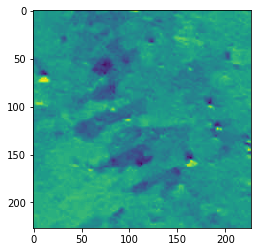

In [22]:
predict_image2('negative', 3001)       

Working On Predictable Data : positive

Images Processed from 01901 to 01902

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack


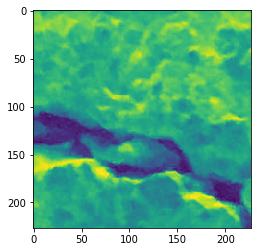

In [23]:
predict_image2('positive', 1901)       

Working On Predictable Data : positive

Images Processed from 01111 to 01112

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack


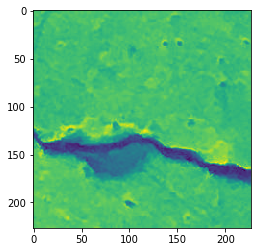

In [24]:
predict_image2('positive', 1111)       

Working On Predictable Data : negative

Images Processed from 09991 to 09992

Raw Predicted Label(Numeric): 1.6058257e-12

Predicted Label : No Crack


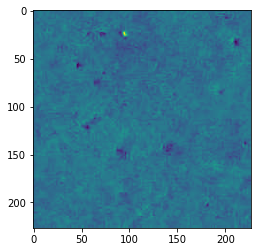

In [25]:
predict_image2('negative', 9991)       

#  Saving Model

In [26]:
model.save_weights('third_30_weights.h5')
model.save('third_30.h5')